In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [2]:
#one dataframe
df = pd.read_excel('CaraHittahV2.xlsx',sheetname=None,ignore_index=True,sort=True)
cdf = pd.concat(df.values())


/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#strikezone
xmin = -1.5
xmax = 1.5
zmin = 1
zmax = 3.5
xdelta = (xmax-xmin)
zdelta = (zmax-zmin)/3


In [4]:
hitters = cdf.iloc[1:]

In [5]:
h2 = cdf.iloc[2:,]

In [6]:
cols = cdf.iloc[1, :]


In [7]:
hitters.columns = cols

In [8]:
h2.columns = cols

In [9]:
h2['User'].unique()

array(['TJ Rigaud', 'Joey Kassis', 82.42400000000002, 'User',
       'Ian McIntyre', 'Sayler Shank', 86.02685589519643, 'Bo McClintock',
       nan, 70.93428571428572, 'Jimmy Moses', 68.7896551724138,
       'Wyatt Mitchell', 80.99609374999999, 'Thomas Reindl',
       78.25210084033615, 'Marcos Figueroa', 'Dylan Lottinville',
       75.76451612903229, 'Kairee Tekra', 83.9261029411765, 'Aaron Lopez',
       79.07387387387388, 'Chris Davis', 58.870312499999976,
       'Ashwin Honnawarkar', 74.91030927835051, 'Connor Kiffer',
       79.45083682008377, 71.08181818181816, 'Art Schoenstadt',
       58.278723404255345, 74.50537634408599, 'Nic Roes',
       77.4277108433735, 84.16884057971015, 'Anthony Villa',
       87.01874999999998, 'Max Dutto', 58.97872340425531, 'Gabe Parks',
       83.18050632911391, 86.33129251700682, 'Jared Wade', 'Undefined',
       81.70365853658541, 'Eric Downey', 85.56111111111106, 'Davis Sims',
       82.7501510574018, 87.90604395604396, 84.02264150943395,
       

In [10]:
h2.columns
hx = h2[[                 'AB',                'Date',              'Barrel',
         'Strike Zone Width',                  'BV',               'POI X',
              'Bat Material',     'Impact Momentum',        'Horiz. Angle',
                                         'Dist',             'P. Type',
        'Strike Zone Bottom',                 'Pts',                'Velo',
         'Vertical Distance',               'Pitch',                'User',
                     'POI Y',                 'Res',   'Trigger to Impact',
                         
                         'Horizontal Distance',     'Strike Zone Top',
                'Hand Speed',                  'LA',          'Time Stamp',
               'Strike Zone',                                  'POI Z',
                        'AA',                'Type',    ]]              

In [11]:
hx.head()

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
2,18,2018-08-16 18:59:49.111000,0,17,0,-0.44,Undefined,0,-48,8,NaN,22.7,0,56,-7.8,69,TJ Rigaud,25.57,Foul,0,0.7,42.1,0,-16,00:13:47.766000,8,27.11,0,GB
3,22,2018-08-16 19:06:05.982000,0,17,0,1.89,Undefined,0,-30,18,NaN,22.7,0,60.3,-3.6,68.9,TJ Rigaud,30.15,2018-05-03 00:00:00,0,-1.1,42.1,0,-6,00:20:04.637000,8,34.27,0,GB
4,24,2018-08-16 19:06:38.576000,0,17,0,-3.97,Undefined,0,-24,249,NaN,22.7,75,89.7,-4,69.7,TJ Rigaud,28.97,F7,0,4.4,42.1,0,16,00:20:37.231000,9,23.6,0,LD
5,63,2018-08-08 19:53:58.802000,0,17,0,3.12,Undefined,0,-19,35,NaN,21.5,29,87.1,-3.2,76.4,Joey Kassis,29.76,2018-06-03 00:00:00,0,-5.4,40.7,0,-2,00:34:22.267000,4,41.65,0,GB
6,16,2018-08-13 20:27:42.490000,0,17,0,-4.74,Undefined,0,-18,131,NaN,21.5,39,83.2,-2.4,72.9,Joey Kassis,29.36,F6,0,4.6,40.7,0,8,00:12:25.845000,6,24.66,0,LD


In [12]:
hx2 = hx[hx.User.notna()]

In [13]:
def removefloats(row):
    if type (row.User) == float:
        return "dummy"
    else:
        return(row['User'])
    

In [14]:
hx2['User'] = hx2.apply(removefloats,axis=1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
hx2 = hx2[hx2.User!='User']
hx2 = hx2[hx2.User!= 'dummy']

In [16]:
hx2.User.unique()

array(['TJ Rigaud', 'Joey Kassis', 'Ian McIntyre', 'Sayler Shank',
       'Bo McClintock', 'Jimmy Moses', 'Wyatt Mitchell', 'Thomas Reindl',
       'Marcos Figueroa', 'Dylan Lottinville', 'Kairee Tekra',
       'Aaron Lopez', 'Chris Davis', 'Ashwin Honnawarkar',
       'Connor Kiffer', 'Art Schoenstadt', 'Nic Roes', 'Anthony Villa',
       'Max Dutto', 'Gabe Parks', 'Jared Wade', 'Undefined',
       'Eric Downey', 'Davis Sims', 'Eric Kozak', 'Sean Giffen',
       'Brooks Benson', 'Spencer Rankin', 'Andy Schmitz', 'Aiden Ferry',
       'Cameron Haymans', 'Tony Henricksen', 'Andrew Labeck',
       'Finn Mobley', 'Drew Mount', 'Jacob Bockelie', 'Yu Le Li',
       'Chao Ting Tang', 'Nicholas Johnson', 'Nate Clow'], dtype=object)

In [17]:
hx2.sort_values('User')

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
423,5,56:43.3,1,17,0,6.82,Undefined,0,-18,253,NaN,23.1,108,96.7,-4.4,73.9,Aaron Lopez,29.02,3B-8,0,-7.4,42.6,0,14,21:49.9,7,25.36,0,LD
420,2,25:05.1,0,17,0,0.34,Undefined,0,1,66,NaN,23.1,71,96.5,-5,66.1,Aaron Lopez,28.07,1B-8,0,-0.4,42.6,0,1,00:36.0,8,18.73,0,GB
421,2,56:29.8,0,17,0,1.45,Undefined,0,-10,22,NaN,23.1,60,96.5,-5,64.3,Aaron Lopez,28.25,1B-8,0,-1.3,42.6,0,-5,00:34.9,8,20.06,0,GB
422,6,42:18.8,1,17,0,-5.77,Undefined,0,-14,213,NaN,23.1,100,96.5,-6,65.5,Aaron Lopez,28.96,2B-8,0,5.4,42.6,0,11,00:28.3,9,30.21,0,LD
424,41,34:44.6,0,17,0,4.88,Undefined,0,-27,181,NaN,23.1,92,96.7,-6,66.7,Aaron Lopez,28.59,1B-7,0,-6.1,42.6,0,9,32:42.0,7,29.36,0,LD
425,4,20:24.9,1,17,0,3.56,Undefined,0,-5,350,NaN,23.1,120,96.8,-8.9,78.2,Aaron Lopez,24.43,3B-8,0,-3.6,42.6,0,23,14:44.1,7,22.32,0,LD
426,2,35:37.2,0,17,0,-0.93,Undefined,0,-13,208,NaN,23.1,100,96.9,-11.5,66.6,Aaron Lopez,23.3,2B-8,0,1.5,42.6,0,10,00:43.7,13,29.8,0,LD
427,6,04:48.5,0,17,0,-0.7,Undefined,0,-27,16,NaN,23.1,56,96.9,-4.1,77.8,Aaron Lopez,29.22,1B-7,0,0.8,42.6,0,-8,12:44.7,8,23.38,0,GB
428,14,23:57.6,0,17,0,2.36,Undefined,0,-19,17,NaN,23.1,54,96.9,-9.7,68.2,Aaron Lopez,24.89,2018-06-03 00:00:00,0,-1.9,42.6,0,-6,31:53.8,8,28.34,0,GB
429,1,56:33.5,0,17,0,2.32,Undefined,0,-7,173,NaN,23.1,92,96.9,-3.1,75.2,Aaron Lopez,30.12,1B-8,0,-2.2,42.6,0,8,00:38.5,5,20.75,0,LD


In [18]:
maxdutto = hx2[hx2.User == 'Max Dutto']

In [19]:
maxdutto.sample(7)

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA,Type
86,12,2018-09-15 22:47:00.123000,0,17,0,4.24,Undefined,0,33,11,NaN,23.1,6,88.6,-8.8,71.9,Max Dutto,25.27,U3,0,-4.7,42.6,0,-11,01:04:11.687000,7,25.19,0,GB
99,18,2018-09-15 22:29:34.084000,0,17,0,-2.11,Undefined,0,-7,28,NaN,23.1,30,91.2,-4.4,78.9,Max Dutto,28.74,1B-8,0,2,42.6,0,-3,00:46:45.648000,8,20.28,0,GB
106,2,2018-09-15 22:11:35.841000,1,17,0,-1.17,Undefined,0,-9,216,NaN,23.1,67,91.7,-13.4,75.5,Max Dutto,19.87,1B-8,0,1.1,42.6,0,13,00:28:47.406000,13,21.43,0,LD
119,4,31:58.6,0,17,0,-1.09,Undefined,0,35,313,NaN,21.5,50,83.8,-1.3,73.8,Max Dutto,30.91,F9,0,0.8,40.7,0,30,09:22.6,5,32.21,0,FB
75,12,2018-09-15 22:08:24.607000,0,17,0,2.58,Undefined,0,28,289,NaN,23.1,59,86.8,-9.6,75.2,Max Dutto,22.97,F9,0,-2.5,42.6,0,22,00:25:36.171000,8,13.55,0,LD
38,8,2018-09-15 22:17:01.263000,0,17,0,-2.29,Undefined,0,-50,286,NaN,23.1,0,78,-1,77.3,Max Dutto,31.61,Foul,0,2.3,42.6,0,33,00:34:12.827000,5,13.51,0,FB
82,7,2018-09-15 22:17:46.658000,0,17,0,3.83,Undefined,0,6,356,NaN,23.1,54,88,-3,77.5,Max Dutto,30.89,F8,0,-4,42.6,0,41,00:34:58.222000,4,29.48,0,FB


In [20]:
def norm(x):
    return (x/x.max())



In [21]:
x = maxdutto.groupby(['Type']).count()
x

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,POI Z,AA
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FB,52,52,52,52,52,52,52,52,52,52,0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
GB,34,34,34,34,34,34,34,34,34,34,0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
LD,58,58,58,58,58,58,58,58,58,58,0,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [22]:
x.iloc[2,0]

58

In [23]:
x.iloc[:,0].sum()

144

In [24]:
overallhitting = x.iloc[2,0]/x.iloc[:,0].sum()

In [25]:
overallhitting

0.4027777777777778

In [26]:
zlist = maxdutto['Strike Zone'].unique().tolist()
zlist = zlist.sort()

In [27]:
def hittingbyzone(df, zone):
    dfx = df[df['Strike Zone']== zone]
    dfx = dfx.groupby(['Type']).count()
    y = dfx.shape
    s = dfx.iloc[:, 0].sum()
    if y[0] < 3:
        ld = 0
    else:             
        ld = dfx.iloc[2,0]/s
    fb = dfx.iloc[0,0]/s
    gb = dfx.iloc[1,0]/s
    return fb, gb, ld



In [28]:
maxdutto['Strike Zone']

2      12
3       8
4      13
5      13
6       8
7       5
8       5
9       7
10      8
11      5
12      8
13     12
14      5
15      4
16      4
17      5
18      5
19      9
20      8
21      7
22     12
23      5
24      7
25     12
26      5
27      5
28      8
29      7
30      5
31      2
32      5
33      9
34      6
35      8
36      9
37      8
38      5
39     12
40      4
41      8
42      5
43     12
44     13
45      4
46      5
47      2
48     13
49      5
50      8
51      7
52      8
53     12
54     12
55      9
56     12
57      5
58      8
59      7
60      4
61      7
62      7
63      5
64      8
65     12
66      6
67      7
68      2
69      8
70      9
71      6
72      9
73      4
74      5
75      8
76      9
77     13
78      7
79      8
80      7
81      8
82      4
83      7
84      8
85      5
86      7
87      6
88      8
89      6
90      8
91      7
92      5
93      8
94      9
95      7
96      9
97      8
98      8
99      8
100     8
101     8


In [29]:
hittingbyzone(maxdutto, 1)

IndexError: single positional indexer is out-of-bounds

In [30]:

zlist = maxdutto['Strike Zone'].unique().tolist()
zlist.sort()
zlist

[2, 4, 5, 6, 7, 8, 9, 12, 13]

In [31]:
for i in zlist:
    f, g, l = hittingbyzone(maxdutto, i)
    print('Zone ->', i, 'fb%->', f, 'gb%->', g, 'ld%->', l)

Zone -> 2 fb%-> 0.6666666666666666 gb%-> 0.3333333333333333 ld%-> 0
Zone -> 4 fb%-> 0.6363636363636364 gb%-> 0.18181818181818182 ld%-> 0.18181818181818182
Zone -> 5 fb%-> 0.56 gb%-> 0.04 ld%-> 0.4
Zone -> 6 fb%-> 0.42857142857142855 gb%-> 0.42857142857142855 ld%-> 0.14285714285714285
Zone -> 7 fb%-> 0.391304347826087 gb%-> 0.2608695652173913 ld%-> 0.34782608695652173
Zone -> 8 fb%-> 0.2222222222222222 gb%-> 0.24444444444444444 ld%-> 0.5333333333333333
Zone -> 9 fb%-> 0.3333333333333333 gb%-> 0.08333333333333333 ld%-> 0.5833333333333334
Zone -> 12 fb%-> 0.16666666666666666 gb%-> 0.4166666666666667 ld%-> 0.4166666666666667
Zone -> 13 fb%-> 0.16666666666666666 gb%-> 0.6666666666666666 ld%-> 0.16666666666666666


In [32]:
 y.shape

NameError: name 'y' is not defined

In [33]:
maxdutto.groupby(['Strike Zone']).AB.mean()

    

DataError: No numeric types to aggregate

In [34]:
def my_mean(values):
    sum = 0
    for i in values:
        sum += i
    return(sum/len(values))

In [35]:
maxdutto.groupby('Strike Zone').Velo.agg(my_mean)

Strike Zone
2     80.733333
4     84.427273
5     79.404000
6     88.071429
7     86.739130
8     87.413333
9     86.075000
12    77.058333
13    75.833333
Name: Velo, dtype: float64

In [36]:
maxdutto.groupby('Strike Zone').Velo.max()


Strike Zone
2     85.8
4     93.7
5     96.6
6     95.4
7     98.8
8     98.6
9     96.9
12    94.6
13    91.7
Name: Velo, dtype: float64

In [37]:
maxdutto.groupby('Strike Zone').Velo.min()

Strike Zone
2     75.4
4     69.8
5     60.3
6     76.2
7     63.3
8     47.2
9     71.4
12    30.8
13    56.1
Name: Velo, dtype: float64

In [38]:
def velobyzone(df, zone):
    dfx = df[df['Strike Zone']== zone]
    s = dfx.Velo.sum()
    c = dfx.Velo.count()
    a = s/c
    m = dfx.Velo.max()
    n = dfx.Velo.min()
    return a, m, n
    

In [39]:
velobyzone(maxdutto, 9)

(86.075, 96.9, 71.4)

In [40]:
for i in zlist:
    x, y, z = velobyzone(maxdutto, i)
    print(i, x, y, z)
        

2 80.73333333333333 85.8 75.4
4 84.42727272727274 93.7 69.8
5 79.40399999999998 96.6 60.3
6 88.07142857142857 95.4 76.2
7 86.73913043478261 98.8 63.3
8 87.41333333333333 98.6 47.2
9 86.075 96.9 71.4
12 77.05833333333334 94.6 30.8
13 75.83333333333333 91.7 56.1


In [41]:
hx2 = hx2.rename(index=str,columns={'POI X':'X','POI Y':'Y'})
    

In [57]:
def homeplate():
    plt.figure(figsize=(8,12),dpi=80)
    plt.xlim(-18,18)
    plt.ylim(0,60)

    xmin = -8.5
    xmax = 8.5
    ymin = 23.1
    ymax = 44.6
    deltax = (xmax-xmin)/3
    deltay = (ymax-ymin)/3

    xtick = [xmin, xmin+deltax, xmin+(2*deltax), xmax]
    ytick = [ymin, ymin+deltay, ymin+(2*deltay), ymax]

    X1 = np.linspace(xmin,xmax,4)
    Y1 = np.linspace(ymin,ymax,4)
    Y2 = np.linspace(ymin,ymin,4)
    X2 = np.linspace(xmin,xmin,4)
    X3 = np.linspace(xmax,xmax,4)
    Y3 = np.linspace(ymax,ymax,4)


    X4 = np.linspace(xtick[1],xtick[1],4)
    X5 = np.linspace(xtick[2],xtick[2],4)
    Y4 = np.linspace(ytick[1],ytick[1],4)
    Y5 = np.linspace(ytick[2],ytick[2],4)


    plt.plot(X1,Y2,c='black')
    plt.plot(X2,Y1,c='black')
    plt.plot(X1,Y3,c='black')
    plt.plot(X3,Y1,c='black')


    plt.plot(X4,Y1,c='black',linestyle= '--')
    plt.plot(X5,Y1,c='black',linestyle= '--')
    plt.plot(X1,Y4,c='black',linestyle= '--')
    plt.plot(X1,Y5,c='black',linestyle= '--')

def analyze(hx2,username,date1,date2,v1,v2):
    hnew = hx2[hx2.User == username]
    hnew = hnew[(hnew.Pitch>v1)& (hnew.Pitch<v2)]
    homeplate()
    #plt.scatter(hnew.X,hnew.Y)
    #h1 = hnew[(hnew.LA<5)]
    h0  = hnew[(hnew.LA>10)&(hnew.LA < 30)]
    h00 = h0[h0.Velo >= 90]
    h01 = h0[(h0.Velo <90) & (h0.Velo >83)]
    h02 = h0[h0.Velo <= 83]
    h1  = hnew[(hnew.LA<0)]  
    h10 = h1[h1.Velo>85]
    #x = hnew.X
    #y=hnew.Y
    plt.scatter(h00.X,h00.Y, c='g',s=20, label='EV>90, LA 10-30')
    plt.scatter(h01.X, h01.Y, c ='g',s=8,label='EV 83-90,LA 10-30')
    #plt.scatter(h01.X, h01.Y, c='black', s=8)
    plt.scatter(h02.X, h02.Y, c='g', s=8)
    plt.scatter(h1.X,h1.Y,c='r', s=8, marker='*')
    plt.scatter(h10.X,h10.Y,c='blue',s=8, marker='s')
    plt.xlabel('Horizontal Location' )
    plt.ylabel('Vertical Location')
    plt.title(username)
    
    #return hnew
    plt.legend([ 'EV>90, LA 10-30','EV 83-90,LA 10-30'],loc=0)


In [49]:
hx2.User

2             TJ Rigaud
3             TJ Rigaud
4             TJ Rigaud
5           Joey Kassis
6           Joey Kassis
7           Joey Kassis
8             TJ Rigaud
9           Joey Kassis
10          Joey Kassis
11          Joey Kassis
12            TJ Rigaud
13          Joey Kassis
14          Joey Kassis
15            TJ Rigaud
16            TJ Rigaud
17            TJ Rigaud
18            TJ Rigaud
19          Joey Kassis
20            TJ Rigaud
21            TJ Rigaud
22          Joey Kassis
23          Joey Kassis
24            TJ Rigaud
25          Joey Kassis
26          Joey Kassis
27            TJ Rigaud
28          Joey Kassis
29          Joey Kassis
30          Joey Kassis
31          Joey Kassis
32          Joey Kassis
33          Joey Kassis
34          Joey Kassis
35          Joey Kassis
36          Joey Kassis
37          Joey Kassis
38            TJ Rigaud
39          Joey Kassis
40          Joey Kassis
41          Joey Kassis
42          Joey Kassis
43          Joey

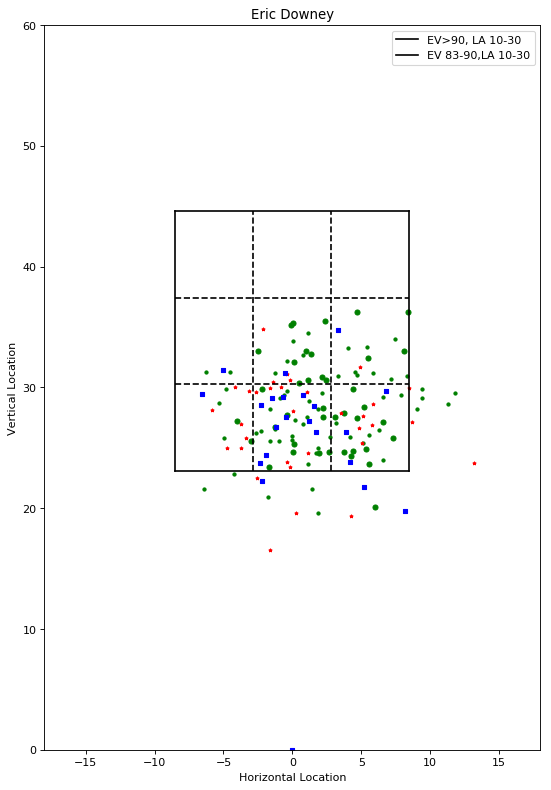

In [58]:
analyze(hx2,'Eric Downey','11/22/18','12/3/18',60,90)

In [ ]:
hx2.head()

In [ ]:
homeplate()
plt.scatter(maxdutto['POI X'],  maxdutto['POI Y'])

In [ ]:
analyze(hx2, 'Nate Clow', 44,55, 60, 90)